## 데이터 전처리

In [2]:
import numpy as np
import pandas as pd
# import matplotlib.pylot as plt
import matplotlib
import warnings

warnings.filterwarnings('ignore')
cust_df = pd.read_csv('./train.csv', encoding='latin-1')
cust_df.head(3)

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.17,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.03,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.77,0


In [3]:
cust_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76020 entries, 0 to 76019
Columns: 371 entries, ID to TARGET
dtypes: float64(111), int64(260)
memory usage: 215.2 MB


In [6]:
print(cust_df['TARGET'].value_counts())
unsatisfied_cnt = cust_df[cust_df['TARGET'] ==1].TARGET.count()
total_cnt = cust_df.TARGET.count()
print('unsatisfied비율은 {0:.2f}'.format((unsatisfied_cnt / total_cnt)))

TARGET
0    73012
1     3008
Name: count, dtype: int64
unsatisfied비율은 0.04


대부분이 만족이며 불만족 비율은 0.04%에 불과하다.

In [7]:
cust_df.describe()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,...,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000
mean,75964.050723,-1523.199277,33.212865,86.208265,72.363067,119.529632,3.559130,6.472698,0.412946,0.567352,...,7.935824,1.365146,12.215580,8.784074,31.505324,1.858575,76.026165,56.614351,1.172358e+05,0.039569
std,43781.947379,39033.462364,12.956486,1614.757313,339.315831,546.266294,93.155749,153.737066,30.604864,36.513513,...,455.887218,113.959637,783.207399,538.439211,2013.125393,147.786584,4040.337842,2852.579397,1.826646e+05,0.194945
min,1.000000,-999999.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.163750e+03,0.000000
25%,38104.750000,2.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.787061e+04,0.000000
50%,76043.000000,2.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.064092e+05,0.000000
75%,113748.750000,2.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.187563e+05,0.000000
max,151838.000000,238.000000,105.000000,210000.000000,12888.030000,21024.810000,8237.820000,11073.570000,6600.000000,6600.000000,...,50003.880000,20385.720000,138831.630000,91778.730000,438329.220000,24650.010000,681462.900000,397884.300000,2.203474e+07,1.000000


In [8]:
cust_df['var3'].replace(-999999,2,inplace=True)
cust_df.drop('ID', axis=1, inplace=True)

X_features = cust_df.iloc[:, :-1]
y_labels = cust_df.iloc[:,-1]
print('피처 데이터 shape:{0}'.format(X_features.shape))

피처 데이터 shape:(76020, 369)


In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_features, y_labels, test_size=0.2, random_state=0)
train_cnt = y_train.count()
test_cnt = y_test.count()
print('학습 세트 Shape:{0}, 테스트 세트 Shape:{1}'.format(X_train.shape, X_test.shape))

print('학습 세트 레이블 값 비율')
print(y_train.value_counts()/train_cnt)
print('테스트 세트 레이블 비율')
print(y_test.value_counts()/test_cnt)

학습 세트 Shape:(60816, 369), 테스트 세트 Shape:(15204, 369)
학습 세트 레이블 값 비율
TARGET
0    0.960964
1    0.039036
Name: count, dtype: float64
테스트 세트 레이블 비율
TARGET
0    0.9583
1    0.0417
Name: count, dtype: float64


test_size=0.2 이므로 train데이터 : test데이터는 8대2 비율을 유지한다.  
학습 데이터와 테스트 데이터의 TARGET값 분포가 원본과 유사하게 나오도록 한다.

In [10]:
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=0)

## XGBoost 모델 학습과 하이퍼 파라미터 튜닝

### XGBoost 모델 학습

In [20]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score

xgb_clf = XGBClassifier(n_estimators=500, learning_rate=0.05, random_state=156, early_stopping_round=100)

xgb_clf.fit(X_tr, y_tr, eval_set=[(X_tr, y_tr), (X_val, y_val)])

xgb_roc_score = roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:,1])
print('ROC AUC: {0:.4f}'.format(xgb_roc_score)) # XGBoost ROC AUC: 0.8385

[0]	validation_0-logloss:0.16022	validation_1-logloss:0.16168
[1]	validation_0-logloss:0.15667	validation_1-logloss:0.15864
[2]	validation_0-logloss:0.15373	validation_1-logloss:0.15609
[3]	validation_0-logloss:0.15124	validation_1-logloss:0.15399
[4]	validation_0-logloss:0.14907	validation_1-logloss:0.15215
[5]	validation_0-logloss:0.14709	validation_1-logloss:0.15057
[6]	validation_0-logloss:0.14537	validation_1-logloss:0.14912
[7]	validation_0-logloss:0.14379	validation_1-logloss:0.14789
[8]	validation_0-logloss:0.14241	validation_1-logloss:0.14679
[9]	validation_0-logloss:0.14111	validation_1-logloss:0.14579
[10]	validation_0-logloss:0.13993	validation_1-logloss:0.14488
[11]	validation_0-logloss:0.13878	validation_1-logloss:0.14407
[12]	validation_0-logloss:0.13773	validation_1-logloss:0.14329
[13]	validation_0-logloss:0.13674	validation_1-logloss:0.14257
[14]	validation_0-logloss:0.13582	validation_1-logloss:0.14192
[15]	validation_0-logloss:0.13497	validation_1-logloss:0.14132
[1

In [21]:
# n_estimators=500, learning_rate=0.05, random_state=156, early_stopping_round=100 => ROC AUC: 0.8385
# n_estimators=700, learning_rate=0.05, random_state=156, early_stopping_round=200 => ROC AUC: 0.8345
# n_estimators=500, learning_rate=0.07, random_state=156, early_stopping_round=100 => ROC AUC: 0.8322
# n_estimators=900, learning_rate=0.05, random_state=156, early_stopping_round=100 => ROC AUC: 0.8294

### XGBoost의 하이퍼 파라미터 튜닝

In [41]:
import sys
!{sys.executable} -m pip install hyperopt
from hyperopt import hp

xgb_search_space = {'max_depth':hp.quniform('max_depth',5,15,1),
                    'min_child_weight':hp.quniform('min_child_weight',1,6,1),
                    'colsample_bytree':hp.uniform('colsample_bytree',0.5,0.95),
                    'learning_rate':hp.uniform('learning_rate',0.01,0.2) }

### K-Fold

In [47]:
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
from xgboost import XGBClassifier
import numpy as np

def objective_func(search_space):
    xgb_clf = XGBClassifier(n_estimators=100, 
                            max_depth=int(search_space['max_depth']),
                            min_child_weight=int(search_space['min_child_weight']),
                            colsample_bytree=search_space['colsample_bytree'],
                            learning_rate=search_space['learning_rate'],
                           early_stopping_rounds=30)

    roc_auc_list = []

    kf = KFold(n_splits=3)

    for tr_index, val_index in kf.split(X_train):
        X_tr, y_tr = X_train.iloc[tr_index], y_train.iloc[tr_index]
        X_val, y_val = X_train.iloc[val_index], y_train.iloc[val_index]
        
        xgb_clf.fit(X_tr, y_tr,
                    eval_set=[(X_tr, y_tr), (X_val, y_val)],
                    verbose=False)
        
        score = roc_auc_score(y_val, xgb_clf.predict_proba(X_val)[:, 1])
        roc_auc_list.append(score)

    return -1 * np.mean(roc_auc_list)


In [48]:
from hyperopt import fmin, tpe, Trials

trials = Trials()

best = fmin(fn=objective_func, space=xgb_search_space,
            algo=tpe.suggest,
            max_evals=50,
            trials=trials,
            rstate=np.random.default_rng(seed=30))

print('best:',best)

100%|███████████████████████████████████████████████| 50/50 [13:15<00:00, 15.91s/trial, best loss: -0.8387962102037628]
best: {'colsample_bytree': 0.7896425601973851, 'learning_rate': 0.10113565387321358, 'max_depth': 5.0, 'min_child_weight': 5.0}


In [55]:
xgb_clf = XGBClassifier(n_estimators=500, learning_rate=round(best['learning_rate'],5),
                        max_depth = int(best['max_depth']),
                        min_child_weight = int(best['min_child_weight']),
                        colsample_bytree=round(best['colsample_bytree'],5),
                        early_stopping_rounds=100
                       )

xgb_clf.fit(X_tr, y_tr,
            eval_set=[(X_tr, y_tr), (X_val, y_val)])

xgb_roc_score = roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:,1])
print('ROC AUC: {0:.4f}'.format(xgb_roc_score)) # 하이퍼파라미터 튜닝 ROC AUC: 0.8424

[0]	validation_0-logloss:0.15884	validation_1-logloss:0.16428
[1]	validation_0-logloss:0.15571	validation_1-logloss:0.16123
[2]	validation_0-logloss:0.15342	validation_1-logloss:0.15883
[3]	validation_0-logloss:0.14874	validation_1-logloss:0.15420
[4]	validation_0-logloss:0.14723	validation_1-logloss:0.15282
[5]	validation_0-logloss:0.14424	validation_1-logloss:0.14992
[6]	validation_0-logloss:0.14175	validation_1-logloss:0.14750
[7]	validation_0-logloss:0.13973	validation_1-logloss:0.14556
[8]	validation_0-logloss:0.13868	validation_1-logloss:0.14475
[9]	validation_0-logloss:0.13710	validation_1-logloss:0.14326
[10]	validation_0-logloss:0.13635	validation_1-logloss:0.14266
[11]	validation_0-logloss:0.13511	validation_1-logloss:0.14154
[12]	validation_0-logloss:0.13403	validation_1-logloss:0.14061
[13]	validation_0-logloss:0.13347	validation_1-logloss:0.14019
[14]	validation_0-logloss:0.13258	validation_1-logloss:0.13948
[15]	validation_0-logloss:0.13186	validation_1-logloss:0.13881
[1

### 결과
XGBoost ROC AUC: 0.8385  
하이퍼파라미터 튜닝 ROC AUC: 0.8424  
  
튜닝 이후 개선되었다.
단, XGBoost가 GBM보다는 빠르지만 아무래도 GBM을 기반으로 하기 때문에 수행 시간이 상당히 많이 요구된다.  
앙상블 계열 알고리즘에서 하이퍼 파라미터 튜닝으로 성능 수치 개선이 급격히 되는 경우는 많지 않다.  

튜닝된 모델에서 각 피처의 중요도를 피처 중요도 그래프로 표현 -> xgboost 모듈의 plot_importance() 사용

<Figure size 1000x800 with 0 Axes>

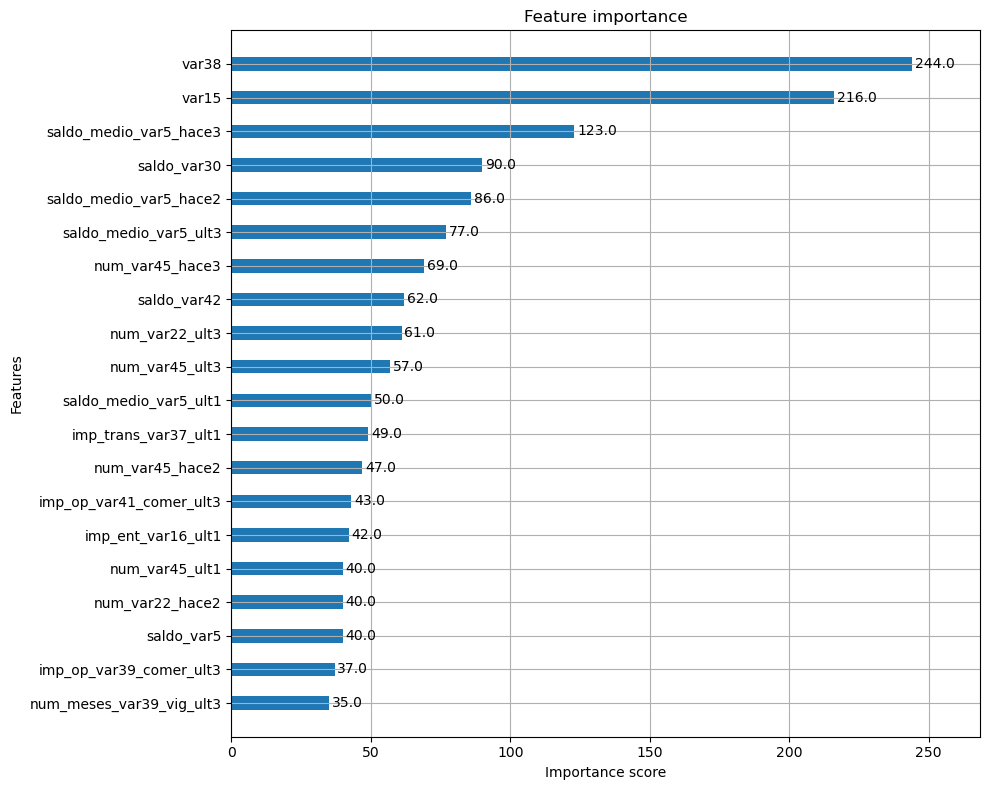

In [62]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(1,1,figsize=(10,8))
plot_importance(xgb_clf, ax=ax, max_num_features=20, height=0.4)

plt.tight_layout()
plt.show()

XGBoost 예측 성능을 좌우하는 중요 피처 : var38, var15

## LightGBM 모델 학습과 하이퍼 파라미터 튜닝

### LightGBM모델 학습

In [64]:
from lightgbm import LGBMClassifier

lgbm_clf = LGBMClassifier(n_estimators=500, early_stopping_rounds=100)

eval_set=[(X_tr, y_tr), (X_val, y_val)]
lgbm_clf.fit(X_tr, y_tr, eval_set=eval_set)

lgbm_roc_Score = roc_auc_score(y_test, lgbm_clf.predict_proba(X_test)[:,1])
print('ROC AUC: {0:4f}'.format(lgbm_roc_Score))

[LightGBM] [Warning] early_stopping_round is set=100, early_stopping_rounds=100 will be ignored. Current value: early_stopping_round=100
[LightGBM] [Info] Number of positive: 1560, number of negative: 38984
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.061430 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13234
[LightGBM] [Info] Number of data points in the train set: 40544, number of used features: 241
[LightGBM] [Warning] early_stopping_round is set=100, early_stopping_rounds=100 will be ignored. Current value: early_stopping_round=100
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.038477 -> initscore=-3.218465
[LightGBM] [Info] Start training from score -3.218465
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[47]	training's binary_logloss: 0.10964	valid_1's binary_logloss: 0.13

### LightGBM의 하이퍼 파라미터 튜닝

In [65]:
lgbm_search_space = {'num_leaves':hp.quniform('num_leaves',32,64,1),
                     'max_depth': hp.quniform('max_depth',100,160,1),
                    'min_child_samples':hp.quniform('min_child_samples',60,100,1),
                    'subsample':hp.uniform('subsample',0.7,1),
                    'learning_rate':hp.uniform('learning_rate',0.01,0.2)
                    }

In [72]:
def objective_func(search_space):
    lgbm_clf = LGBMClassifier(n_estimators=100,
                              num_leaves=int(search_space['num_leaves']),
                              max_depth=int(search_space['max_depth']),
                              min_child_samples=int(search_space['min_child_samples']),
                              subsample=search_space['subsample'],
                              learning_rate=search_space['learning_rate'],
                             early_stopping_rounds=30)
    roc_auc_list = []
    kf = KFold(n_splits=3)
    for tr_index, val_index in kf.split(X_train):
        X_tr, y_tr = X_train.iloc[tr_index], y_train.iloc[tr_index]
        X_val, y_val = X_train.iloc[val_index], y_train.iloc[val_index]
        lgbm_clf.fit(X_tr, y_tr, eval_set=[(X_tr, y_tr),(X_val, y_val)])
        score = roc_auc_score(y_val, lgbm_clf.predict_proba(X_val)[:,1])
        roc_auc_list.append(score)
    return -1 * np.mean(roc_auc_list)

In [73]:
from hyperopt import fmin, tpe, Trials

trials = Trials()

best = fmin(fn=objective_func, space=lgbm_search_space,
            algo=tpe.suggest,
            max_evals=50,
            trials=trials,
            rstate=np.random.default_rng(seed=30))

print('best:',best)

[LightGBM] [Warning] early_stopping_round is set=30, early_stopping_rounds=30 will be ignored. Current value: early_stopping_round=30
[LightGBM] [Info] Number of positive: 1579, number of negative: 38965                                                  
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.056695 seconds.                
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12827                                                                                     
[LightGBM] [Info] Number of data points in the train set: 40544, number of used features: 192                          
[LightGBM] [Warning] early_stopping_round is set=30, early_stopping_rounds=30 will be ignored. Current value: early_stopping_round=30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.038945 -> initscore=-3.205872                                        
[LightGBM] [Info] Start training from score -3.205872                     

In [75]:
lgbm_clf = LGBMClassifier(n_estimators=500, num_leaves=int(best['num_leaves']),
                          max_depth=int(best['max_depth']),
                          min_child_samples=int(best['min_child_samples']),
                          subsample=round(best['subsample'],5),
                          learning_rate=round(best['learning_rate'],5),
                          early_stopping_rounds=100
                         )
lgbm_clf.fit(X_tr, y_tr, eval_set=[(X_tr, y_tr),(X_val, y_val)])
lgbm_roc_score = roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:,1])
print('ROC AUC: {0:.4f}'.format(lgbm_roc_score))

[LightGBM] [Warning] early_stopping_round is set=100, early_stopping_rounds=100 will be ignored. Current value: early_stopping_round=100
[LightGBM] [Info] Number of positive: 1560, number of negative: 38984
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.034880 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 12855
[LightGBM] [Info] Number of data points in the train set: 40544, number of used features: 192
[LightGBM] [Warning] early_stopping_round is set=100, early_stopping_rounds=100 will be ignored. Current value: early_stopping_round=100
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.038477 -> initscore=-3.218465
[LightGBM] [Info] Start training from score -3.218465
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[54]	training's binary_logloss: 0.115794	valid_1's binary_logloss: 0.1

### 결과
LightGBM ROC AUC: 0.838887  
LightGBM 하이퍼파라미터 튜닝 ROC AUC: 0.8424

- XGBoost ROC AUC: 0.8385
- XGBoost 하이퍼파라미터 튜닝 ROC AUC: 0.8424
- LightGBM ROC AUC: 0.8388
- LightGBM 하이퍼파라미터 튜닝 ROC AUC: 0.8424  
=> LightGBM이 가장 성능이 좋았다.